In [696]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
songs = pd.read_csv("big_df_audio_features.csv")
songs.set_index(["name", "artist"], inplace=True)
#songs


In [697]:
from sklearn.preprocessing import MinMaxScaler
songs_scaled_minmax = MinMaxScaler().fit_transform(songs)

In [698]:
songs_scaled_minmax = pd.DataFrame(songs_scaled_minmax, columns = songs.columns, index = songs.index)

In [699]:
songs_scaled_minmax.drop(columns = ["duration_ms", "time_signature", "key"], axis=1, inplace=True)

In [700]:
from sklearn.cluster import KMeans
songs_kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10, max_iter=300)
songs_kmeans.fit(songs_scaled_minmax)

KMeans(n_clusters=5)

In [701]:
songs_scaled_minmax['clusters'] = songs_kmeans.labels_

In [702]:
#songs_scaled_minmax.groupby("clusters").mean()

In [703]:
centroids = songs_kmeans.cluster_centers_
centroids

array([[ 2.94278128e-01,  9.08911300e-01,  8.51019341e-01,
         1.00000000e+00,  1.18893230e-01,  1.10855024e-02,
         5.98038294e-01,  2.05099587e-01,  2.35922803e-01,
         5.68761716e-01],
       [ 6.55112423e-01,  7.19393043e-01,  8.71644864e-01,
        -1.88737914e-15,  1.02511290e-01,  1.93883494e-01,
         2.25933166e-02,  1.97642275e-01,  5.56501930e-01,
         5.61627227e-01],
       [ 3.41430559e-01,  1.37288907e-01,  6.35796152e-01,
         6.80100756e-01,  4.92635397e-02,  9.35870687e-01,
         6.78746828e-01,  1.46004737e-01,  1.89169149e-01,
         4.92334902e-01],
       [ 6.47435188e-01,  6.83753925e-01,  8.61111477e-01,
         1.00000000e+00,  8.58972437e-02,  2.45113251e-01,
         1.88476311e-02,  1.88040448e-01,  6.12257874e-01,
         5.66291760e-01],
       [ 3.51500387e-01,  8.69892128e-01,  8.45672967e-01,
         4.44089210e-16,  1.05888070e-01,  4.11462606e-02,
         7.52421305e-01,  2.00688543e-01,  2.68898788e-01,
         5.

In [704]:
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3,4,5,6,7,8,9
0,0.294278,0.908911,0.851019,1.000000e+00,0.118893,0.011086,0.598038,0.205100,0.235923,0.568762
1,0.655112,0.719393,0.871645,-1.887379e-15,0.102511,0.193883,0.022593,0.197642,0.556502,0.561627
2,0.341431,0.137289,0.635796,6.801008e-01,0.049264,0.935871,0.678747,0.146005,0.189169,0.492335
3,0.647435,0.683754,0.861111,1.000000e+00,0.085897,0.245113,0.018848,0.188040,0.612258,0.566292
4,0.351500,0.869892,0.845673,4.440892e-16,0.105888,0.041146,0.752421,0.200689,0.268899,0.574963


In [705]:
list(songs_scaled_minmax)

['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'clusters']

In [706]:
songs_scaled_minmax.head()

,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,1
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,3
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,3
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,3
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,2


In [707]:
centroids

,0,1,2,3,4,5,6,7,8,9
0,0.294278,0.908911,0.851019,1.000000e+00,0.118893,0.011086,0.598038,0.205100,0.235923,0.568762
1,0.655112,0.719393,0.871645,-1.887379e-15,0.102511,0.193883,0.022593,0.197642,0.556502,0.561627
2,0.341431,0.137289,0.635796,6.801008e-01,0.049264,0.935871,0.678747,0.146005,0.189169,0.492335
3,0.647435,0.683754,0.861111,1.000000e+00,0.085897,0.245113,0.018848,0.188040,0.612258,0.566292
4,0.351500,0.869892,0.845673,4.440892e-16,0.105888,0.041146,0.752421,0.200689,0.268899,0.574963


In [708]:
list(songs_scaled_minmax)

['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'clusters']

In [709]:
centroids = pd.DataFrame(centroids)
centroids.columns = ['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.294278,0.908911,0.851019,1.000000e+00,0.118893,0.011086,0.598038,0.205100,0.235923,0.568762
1,0.655112,0.719393,0.871645,-1.887379e-15,0.102511,0.193883,0.022593,0.197642,0.556502,0.561627
2,0.341431,0.137289,0.635796,6.801008e-01,0.049264,0.935871,0.678747,0.146005,0.189169,0.492335
3,0.647435,0.683754,0.861111,1.000000e+00,0.085897,0.245113,0.018848,0.188040,0.612258,0.566292
4,0.351500,0.869892,0.845673,4.440892e-16,0.105888,0.041146,0.752421,0.200689,0.268899,0.574963


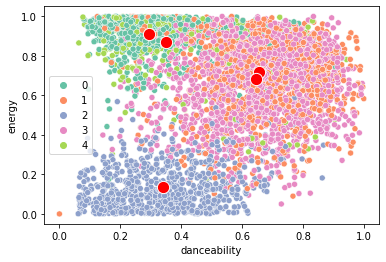

In [710]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

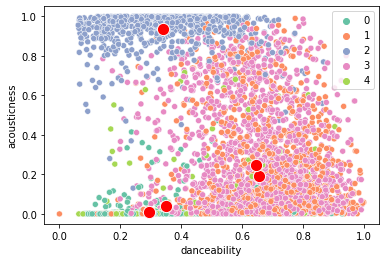

In [711]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='acousticness', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='acousticness', color='red', s=150)
plt.show()

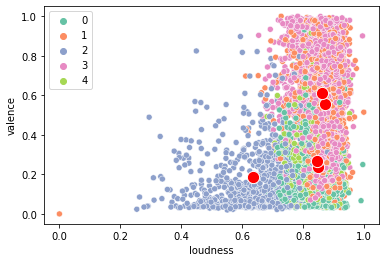

In [712]:
4sns.scatterplot(data=songs_scaled_minmax, x='loudness', y='valence', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='loudness', y='valence', color='red', s=150)
plt.show()

In [713]:
songs_kmeans.inertia_

1390.2499289444152

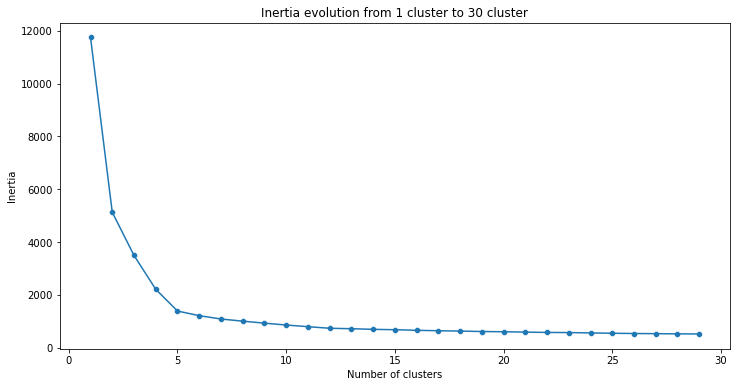

In [714]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [715]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_scaled_minmax, songs_kmeans.labels_)

0.6042764025452861

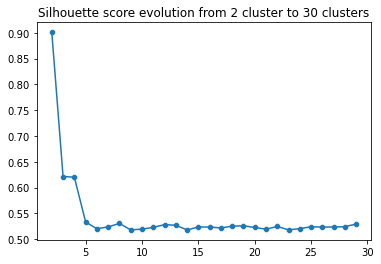

In [716]:
max_k = 30
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(songs).labels_
    sil_score.append(silhouette_score(songs
                                      
                                      
                                      , labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

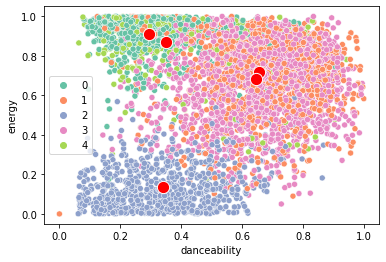

In [717]:
sns.scatterplot(data=songs_scaled_minmax, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

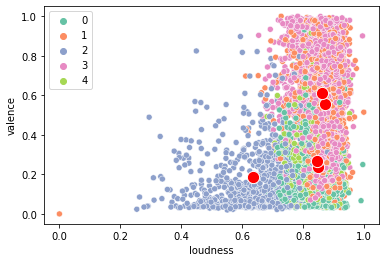

In [718]:
sns.scatterplot(data=songs_scaled_minmax, x='loudness', y='valence', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='loudness', y='valence', color='red', s=150)
plt.show()

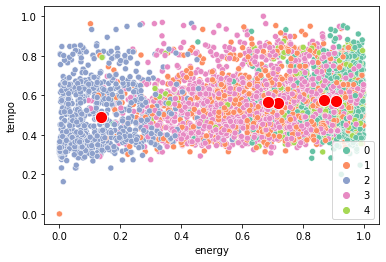

In [719]:
sns.scatterplot(data=songs_scaled_minmax, x='energy', y='tempo', hue='clusters', palette='Set2')
sns.scatterplot(data=centroids, x='energy', y='tempo', color='red', s=150)
plt.show()

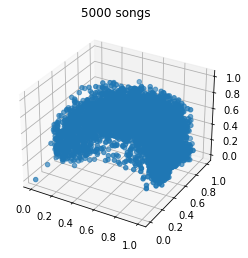

In [720]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('5000 songs')
ax.scatter(xs=songs_scaled_minmax['energy'], ys=songs_scaled_minmax['tempo'], zs=songs_scaled_minmax['danceability'])
plt.show()

In [721]:
songs_scaled_minmax

,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,1
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,3
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,3
Mulher Eu Sei,Chico César,0.729059,0.05020,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,3
Rosa Morena,Kurt Elling,0.673216,0.11900,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,2
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,2


In [722]:
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.294278,0.908911,0.851019,1.000000e+00,0.118893,0.011086,0.598038,0.205100,0.235923,0.568762
1,0.655112,0.719393,0.871645,-1.887379e-15,0.102511,0.193883,0.022593,0.197642,0.556502,0.561627
2,0.341431,0.137289,0.635796,6.801008e-01,0.049264,0.935871,0.678747,0.146005,0.189169,0.492335
3,0.647435,0.683754,0.861111,1.000000e+00,0.085897,0.245113,0.018848,0.188040,0.612258,0.566292
4,0.351500,0.869892,0.845673,4.440892e-16,0.105888,0.041146,0.752421,0.200689,0.268899,0.574963


In [723]:
list(centroids)

['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [724]:
songs_zero = songs_scaled_minmax[songs_scaled_minmax['clusters'] == 0]

In [725]:
songs_zero

,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,,
Under Your Spell,Desire,0.591520,0.599,0.812005,1.0,0.036383,0.027811,0.658883,0.095035,0.481218,0.493271,0
La Nueva Reconquista de Graná,Grupo De Expertos Solynieve,0.236815,0.640,0.858123,1.0,0.051089,0.414659,0.766497,0.093921,0.554315,0.779158,0
"Que No Sea Kang, Por Favor",Los Planetas,0.449845,0.494,0.830883,1.0,0.030392,0.000229,0.867005,0.162107,0.231472,0.439259,0
Your Fucking Sunny Day,Lambchop,0.391934,0.492,0.856656,1.0,0.028867,0.073394,0.595939,0.350557,0.225381,0.488434,0
San Francisco,Foxygen,0.352637,0.552,0.806902,1.0,0.046078,0.000081,0.625381,0.059878,0.493401,0.567134,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Two of Me - remastered 2003,Grave,0.307135,0.874,0.867464,1.0,0.101852,0.000211,0.138071,0.123607,0.165482,0.433343,0
...And Here I Die... Satisfied - remastered 2003,Grave,0.233713,0.919,0.880962,1.0,0.098584,0.000004,0.024162,0.116515,0.247716,0.389598,0
I Deny,Atheist,0.234747,0.971,0.838365,1.0,0.184096,0.000062,0.034924,0.152989,0.142132,0.442474,0


In [726]:
centroids_zero = centroids.iloc[[0]]

In [727]:
songs_zero = songs_zero.sample(n=10
                              
                              )

In [728]:
centroids_zero

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.294278,0.908911,0.851019,1.0,0.118893,0.011086,0.598038,0.2051,0.235923,0.568762


<AxesSubplot:xlabel='name-artist', ylabel='name-artist'>

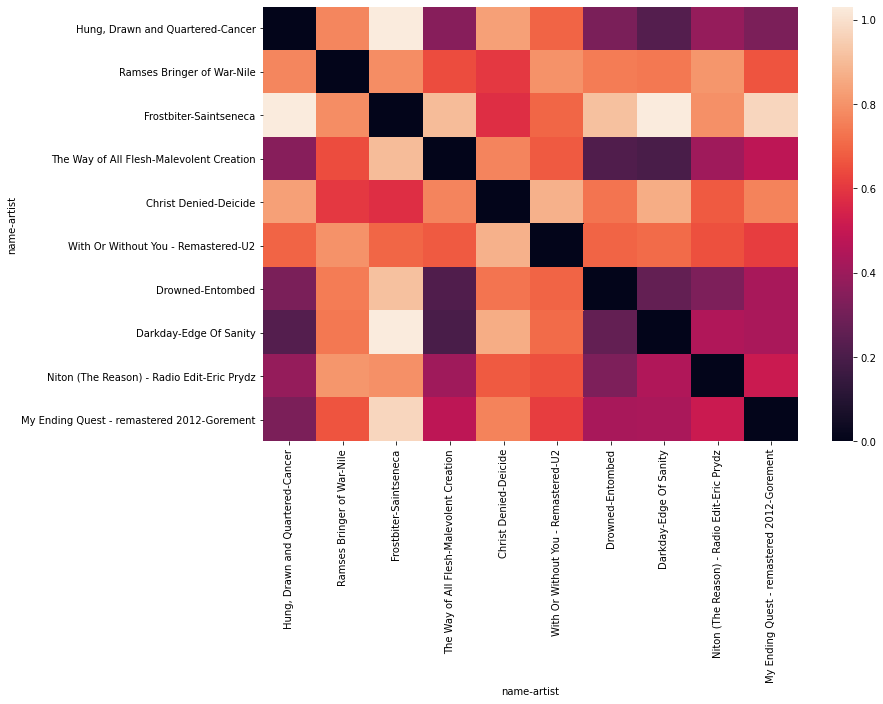

In [729]:
# create a function to do it for all the users
from math import sqrt
all_distances = []

for name in songs_zero.index: 

    ratings = [rating for rating in songs_zero.loc[name]]
    songs_distances = []
    
    for songs_to_compare in songs_zero.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in songs_zero.loc[songs_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        songs_distances.append(distance)
    
    all_distances.append(songs_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  songs_zero.index, index =  songs_zero.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)



In [730]:
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.294278,0.908911,0.851019,1.000000e+00,0.118893,0.011086,0.598038,0.205100,0.235923,0.568762
1,0.655112,0.719393,0.871645,-1.887379e-15,0.102511,0.193883,0.022593,0.197642,0.556502,0.561627
2,0.341431,0.137289,0.635796,6.801008e-01,0.049264,0.935871,0.678747,0.146005,0.189169,0.492335
3,0.647435,0.683754,0.861111,1.000000e+00,0.085897,0.245113,0.018848,0.188040,0.612258,0.566292
4,0.351500,0.869892,0.845673,4.440892e-16,0.105888,0.041146,0.752421,0.200689,0.268899,0.574963


In [731]:
songs_one = songs_scaled_minmax[songs_scaled_minmax['clusters'] == 1]

In [732]:
songs_one = songs_one.sample(n=10)

In [733]:
centroids_one = centroids.iloc[[1]]

<AxesSubplot:xlabel='name-artist', ylabel='name-artist'>

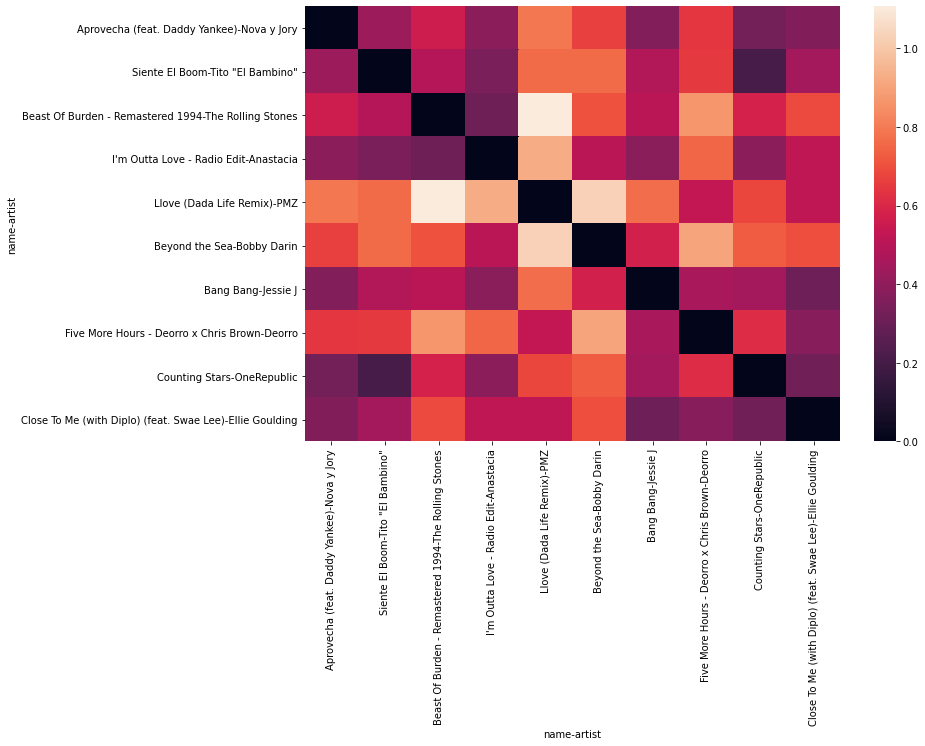

In [734]:
from math import sqrt
all_distances = []

for name in songs_one.index: 

    ratings = [rating for rating in songs_one.loc[name]]
    songs_distances = []
    
    for songs_to_compare in songs_one.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in songs_one.loc[songs_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        songs_distances.append(distance)
    
    all_distances.append(songs_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  songs_one.index, index =  songs_one.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)

In [735]:
songs_two = songs_scaled_minmax[songs_scaled_minmax['clusters'] == 2]

In [736]:
songs_two = songs_two.sample(n=10)

In [737]:
centroids_two = centroids.iloc[[2]]

<AxesSubplot:xlabel='name-artist', ylabel='name-artist'>

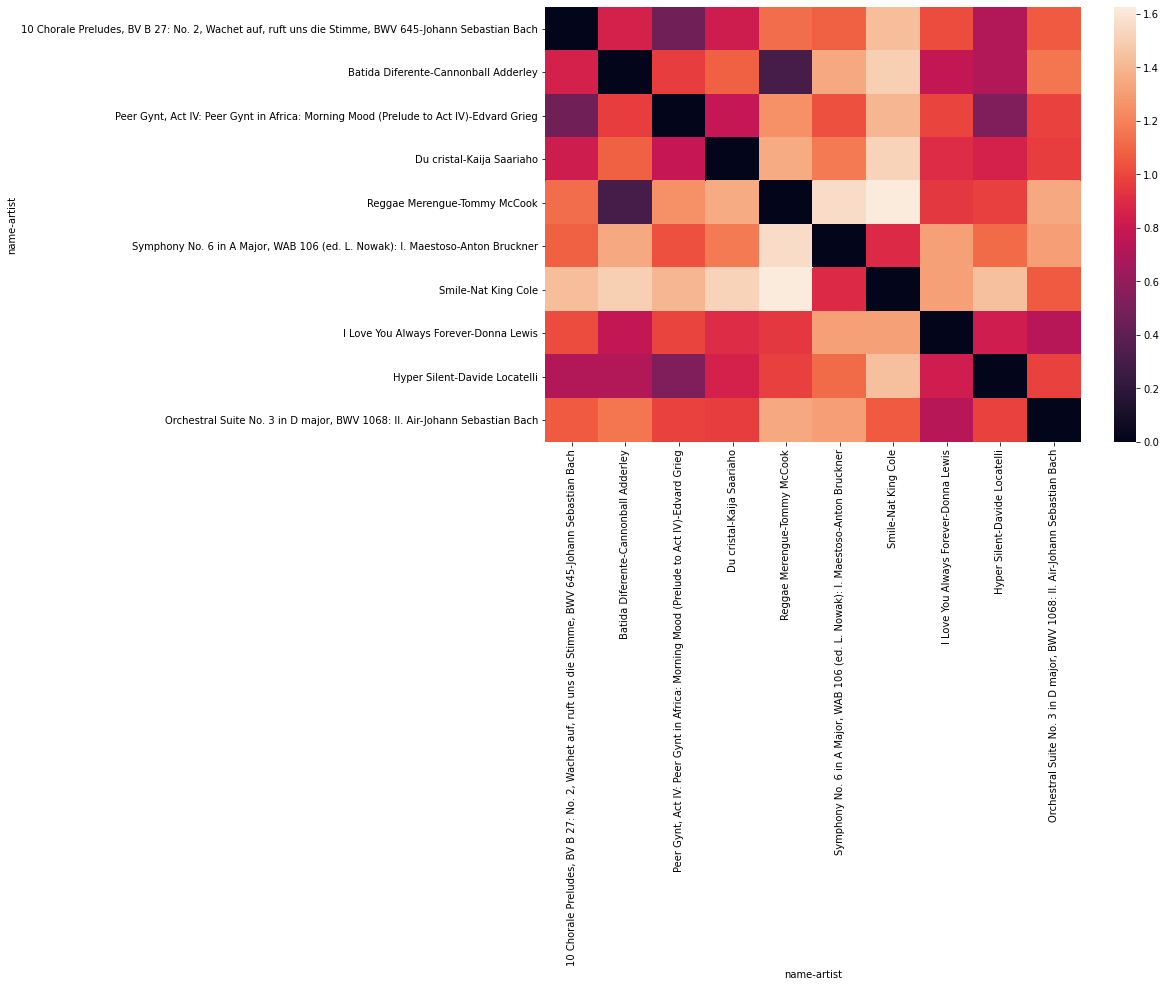

In [738]:
from math import sqrt
all_distances = []

for name in songs_two.index: 

    ratings = [rating for rating in songs_two.loc[name]]
    songs_distances = []
    
    for songs_to_compare in songs_two.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in songs_two.loc[songs_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        songs_distances.append(distance)
    
    all_distances.append(songs_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  songs_two.index, index =  songs_two.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)

In [739]:
songs_three = songs_scaled_minmax[songs_scaled_minmax['clusters'] == 3]

In [740]:
songs_three = songs_three.sample(n=10)

In [741]:
centroids_three = centroids.iloc[[3]]

<AxesSubplot:xlabel='name-artist', ylabel='name-artist'>

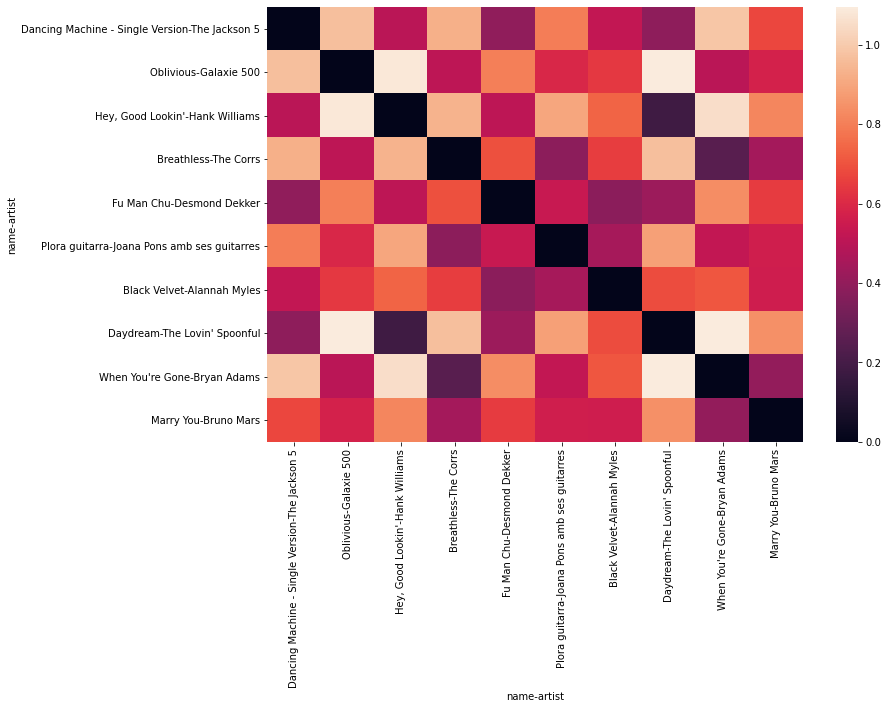

In [742]:
from math import sqrt
all_distances = []

for name in songs_three.index: 

    ratings = [rating for rating in songs_three.loc[name]]
    songs_distances = []
    
    for songs_to_compare in songs_three.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in songs_three.loc[songs_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        songs_distances.append(distance)
    
    all_distances.append(songs_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  songs_three.index, index =  songs_three.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)

In [743]:
songs_four = songs_scaled_minmax[songs_scaled_minmax['clusters'] == 4]

In [744]:
songs_four = songs_four.sample(n=10)

In [745]:
centroids_four = centroids.iloc[[4]]

<AxesSubplot:xlabel='name-artist', ylabel='name-artist'>

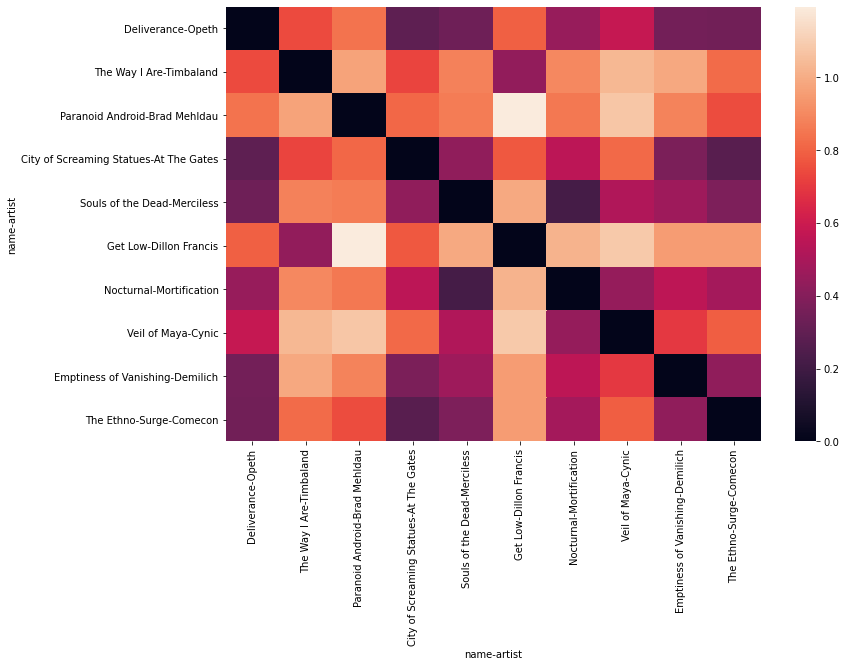

In [746]:
from math import sqrt
all_distances = []

for name in songs_four.index: 

    ratings = [rating for rating in songs_four.loc[name]]
    songs_distances = []
    
    for songs_to_compare in songs_four.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in songs_four.loc[songs_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        songs_distances.append(distance)
    
    all_distances.append(songs_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  songs_four.index, index =  songs_four.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)